In [1]:
%pylab inline 


Populating the interactive namespace from numpy and matplotlib


In [2]:
import gym
import sys
sys.path.append('/home/peter/code/projects')
from gym import error, spaces, utils
from gym.utils import seeding
from collections import Counter
import time
import progressbar as pb
from tqdm import tqdm
import os
import shutil
import aidevutil.denoise as denoise
from empyrical import sortino_ratio, calmar_ratio, omega_ratio
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy, ActorCriticPolicy, FeedForwardPolicy
from stable_baselines.common.vec_env import SubprocVecEnv, VecEnv, VecEnvWrapper
from stable_baselines import A2C, PPO2, DQN, ACKTR
from stable_baselines.common.vec_env import DummyVecEnv
import tensorflow as tf
from trading_env import TradingEnv

Using TensorFlow backend.


vizdoom could not be imported
Pixiedust database opened successfully


In [3]:
# load the market data
input_source = np.load(open('data_eurusd1.npy','rb'))
to_predict = np.load(open('data_eurusd1_targets.npy','rb'))

to_predict = to_predict[3,:].reshape(-1)

input_source = input_source.T

In [4]:
input_source.shape, to_predict.shape

((247944, 176), (247944,))

In [5]:
# lookahead bias on purpose
#input_source = np.roll(input_source, -3)

In [6]:
is_orig = np.copy(input_source)
cp = int(0.8*len(input_source))
test_input_source = input_source[cp:, :]
test_to_predict = to_predict[cp:]
input_source = input_source[0:cp, :]
to_predict = to_predict[0:cp]

In [7]:
input_source.shape, to_predict.shape

((198355, 176), (198355,))

In [8]:
bars_per_episode = 1000
winlen = 1
traded_amt = 10000
initial_balance = 10000000
commission = 0
slippage = 0.0

In [9]:
# multiprocess environment
n_cpu = 16
env = SubprocVecEnv([lambda: TradingEnv(input_source, to_predict,
                 winlen=winlen, bars_per_episode=bars_per_episode, traded_amt=traded_amt, initial_balance=initial_balance,
                 commission=commission, slippage=slippage,
                 reward_type='sortino',
                 min_ratio_trades = 50,
                 ) for i in range(n_cpu)])
#env = TradingEnv(input_source, to_predict,
#                 winlen=winlen, bars_per_episode=bars_per_episode, traded_amt=traded_amt, initial_balance=initial_balance,
#                 commission=commission, slippage=slippage,
#                 reward_type='sortino',
#                 min_ratio_trades = 50,
#                 )
#env = DummyVecEnv([lambda: env])

t = 0
# Custom MLP policy of two layers of size 32 each with tanh activation function
policy_kwargs = dict(act_fun=tf.nn.relu, net_arch=[32, 32])

#[shutil.rmtree('/home/peter/tblog/'+x) for x in os.listdir('/home/peter/tblog/') if x]
# model = PPO2(MlpPolicy, env, n_steps=32, verbose=0, #nminibatches=1, 
#              policy_kwargs=policy_kwargs, 
#              gamma=0.99,#0.99,
#              ent_coef=0.01,#0.01,
#              learning_rate=0.0005,
#              vf_coef=0.5,
#              max_grad_norm=0.5,
#              lam=0.95,
#              tensorboard_log='/home/peter/tblog')
model = ACKTR(MlpPolicy, env, verbose=1, 
              tensorboard_log='/home/peter/tblog')
try:
    model.learn(total_timesteps=1_250_000)
    model.save("ppo2_trading")
except KeyboardInterrupt:
    pass

W0711 06:35:05.008264 140682073737024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/tf_util.py:98: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0711 06:35:05.010377 140682073737024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/tf_util.py:107: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0711 06:35:05.023241 140682073737024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/policies.py:114: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0711 06:35:05.024454 140682073737024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/input.py:25: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 06:35:05.028007 140682073737024 deprecation.py:323] From /u

---------------------------------
| explained_variance | -128     |
| fps                | 534      |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| policy_loss        | -0.542   |
| total_timesteps    | 0        |
| value_loss         | 0.492    |
---------------------------------
----------------------------------
| explained_variance | -0.000512 |
| fps                | 5494      |
| nupdates           | 100       |
| policy_entropy     | 1.03      |
| policy_loss        | 15.5      |
| total_timesteps    | 31779     |
| value_loss         | 1.33e+03  |
----------------------------------
----------------------------------
| explained_variance | -9.66e-06 |
| fps                | 5629      |
| nupdates           | 200       |
| policy_entropy     | 1.01      |
| policy_loss        | -1.94     |
| total_timesteps    | 63879     |
| value_loss         | 1.37e+03  |
----------------------------------
----------------------------------
| explained_variance | -0.000

Process ForkProcess-14:
Process ForkProcess-15:
Process ForkProcess-13:
Process ForkProcess-16:
Process ForkProcess-11:
Process ForkProcess-6:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkProcess-1:
Traceback (most recent call last):
Process ForkProcess-12:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkProcess-10:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process ForkProcess-9:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process ForkProcess-2:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self

  File "/usr/local/lib/python3.6/dist-packages/stable_baselines/common/vec_env/subproc_vec_env.py", line 16, in _worker
    cmd, data = remote.recv()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/lib/python3.6/dist-pack

100%|██████████| 1000/1000 [00:00<00:00, 2905.50it/s]


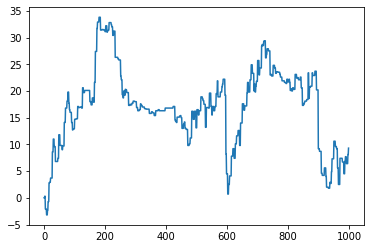

In [10]:
env = TradingEnv(test_input_source, test_to_predict,
                 winlen=winlen, bars_per_episode=1000, traded_amt=traded_amt,
                 commission=commission, slippage=slippage
                 )
env = DummyVecEnv([lambda: env])


nstate = model.initial_state  # get the initial state vector for the reccurent network
#dones = np.zeros(nstate.shape[0])  # set all environment to not done
nstate=None

observation = env.envs[0].reset()#env.reset()
done = False
navs = []
acts = []
for i in tqdm(range(bars_per_episode)):
    action, nstate = model.predict([observation], state=nstate)
    acts.append(action)
    observation, reward, done, info = env.envs[0].step(action)#env.step(action)
    if done:
        break
    navs.append(env.get_attr('balance')[0])


kl = []
t = 0
for n in np.diff(np.vstack(navs).reshape(-1)):
    t = t + n
    kl.append(t)
plot(kl);

In [11]:
len(navs)

1000

In [12]:
# calculate the likelihood of success for any given episode
try:
    l = 1000

    krl = []
    p = pb.ProgressBar(max_value=l)
    for i in range(l):
        p.update(i)
        observation = env.envs[0].reset()
        done = False
        navs = []
        for i in (range(bars_per_episode)):
            action, nstate = model.predict([observation], state=nstate)
            acts.append(action)
            observation, reward, done, info = env.envs[0].step(action)#env.step(action)
            navs.append(env.get_attr('balance')[0])
        kl = []
        t = 0
        for n in np.diff(np.vstack(navs).reshape(-1)):
            t = t + n
            kl.append(t)
        krl.append(kl[-1])
    p.finish()
except KeyboardInterrupt:
    pass

krl = np.array(krl)
print('Profit likelihood: %3.3f%%' % (100*(sum(krl > 0) / len(krl))))

  1% (18 of 1000) |                      | Elapsed Time: 0:00:06 ETA:   0:06:36

Profit likelihood: 55.556%


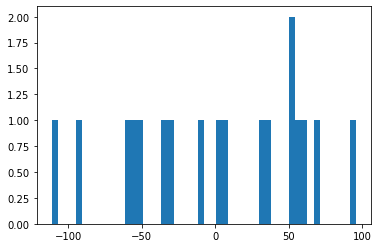

In [13]:
hist(krl,50);